In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('amazon_alexa.tsv', sep='\t')
df.head()


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


<Axes: xlabel='rating', ylabel='count'>

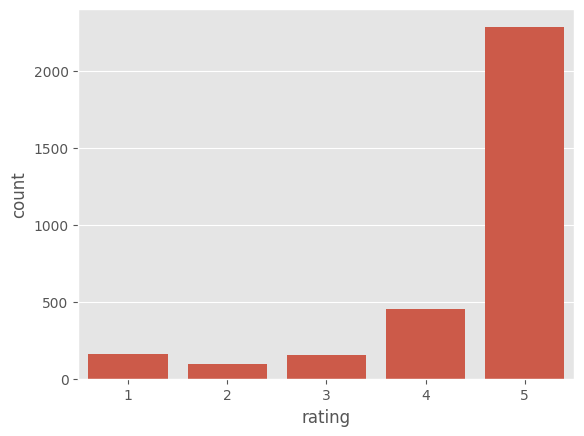

In [ ]:
sns.countplot(x='rating', data=df)


In [ ]:
df['rating'].value_counts()


,count
rating,
5,2286
4,455
1,161
3,152
2,96


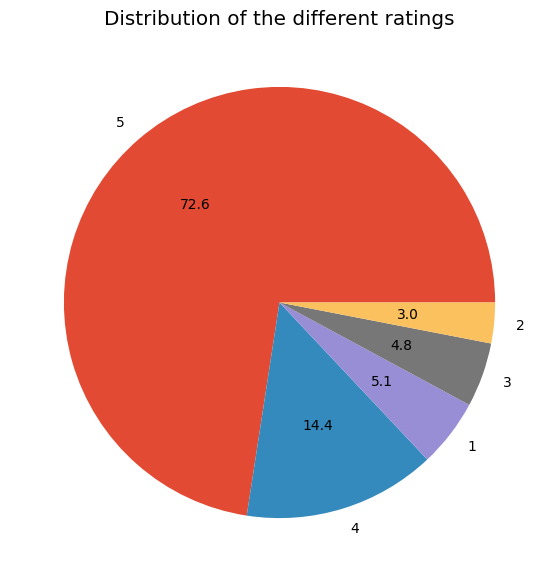

In [ ]:
fig = plt.figure(figsize=(7,7))
tags = df['rating'].value_counts()
tags.plot(kind='pie', autopct='%1.1f', label='')
plt.title('Distribution of the different ratings')
plt.show()

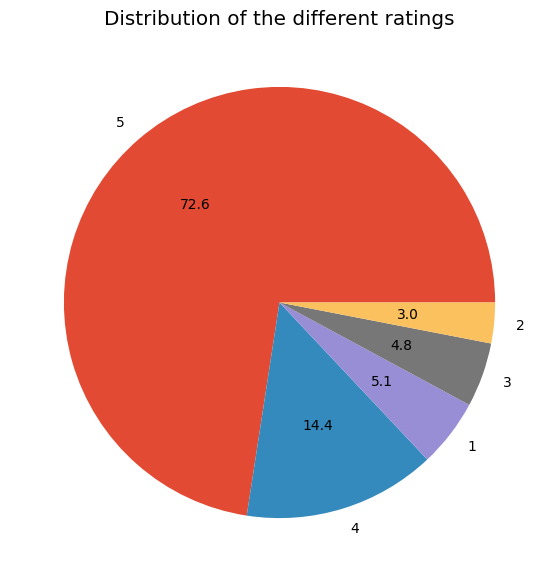

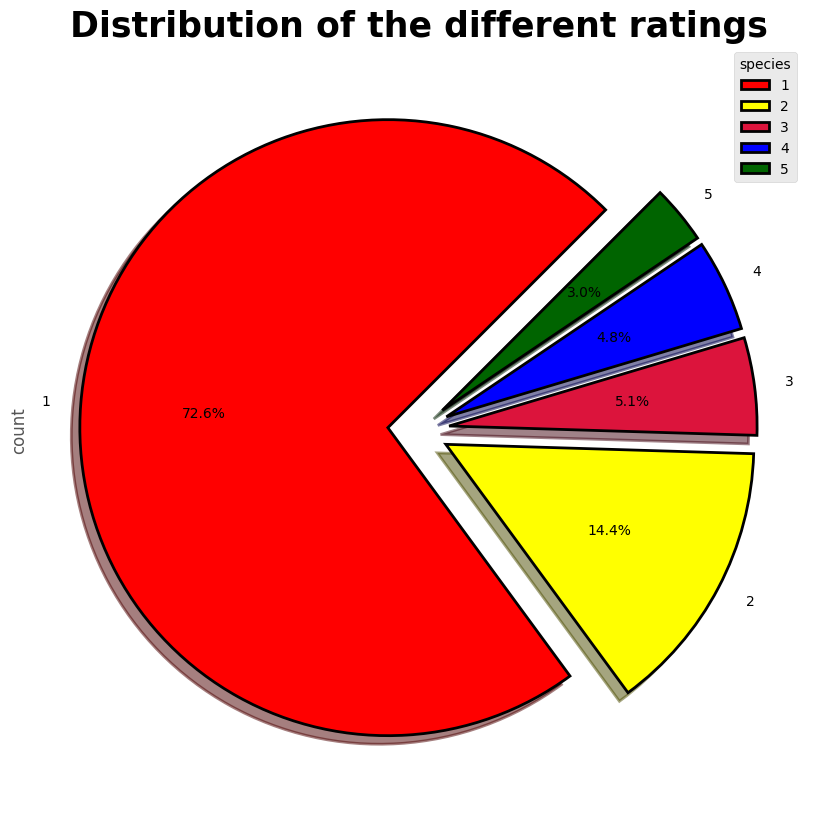

In [ ]:
fig = plt.figure(figsize=(7,7))
tags = df['rating'].value_counts()
tags.plot(kind='pie', autopct='%1.1f', label='')
plt.title('Distribution of the different ratings')
plt.show()

fig = plt.figure(figsize=(10,10))
colors = ("red", "yellow", "crimson", "blue", "darkgreen")
wp = {'linewidth':2, 'edgecolor':"black"}
data = df['rating'].value_counts()
explode = (0.1,0.1,0.1, 0.1,0.1)
classes = ['1','2','3','4','5']
data.plot(kind='pie', autopct='%0.1f%%',labels=classes, startangle = 45, colors = colors,
         explode = explode, shadow=True, wedgeprops = wp)
plt.legend(title="species")
plt.title("Distribution of the different ratings", loc='center', color='black', fontsize='25', fontweight='bold')
plt.show()

<Axes: xlabel='count', ylabel='variation'>

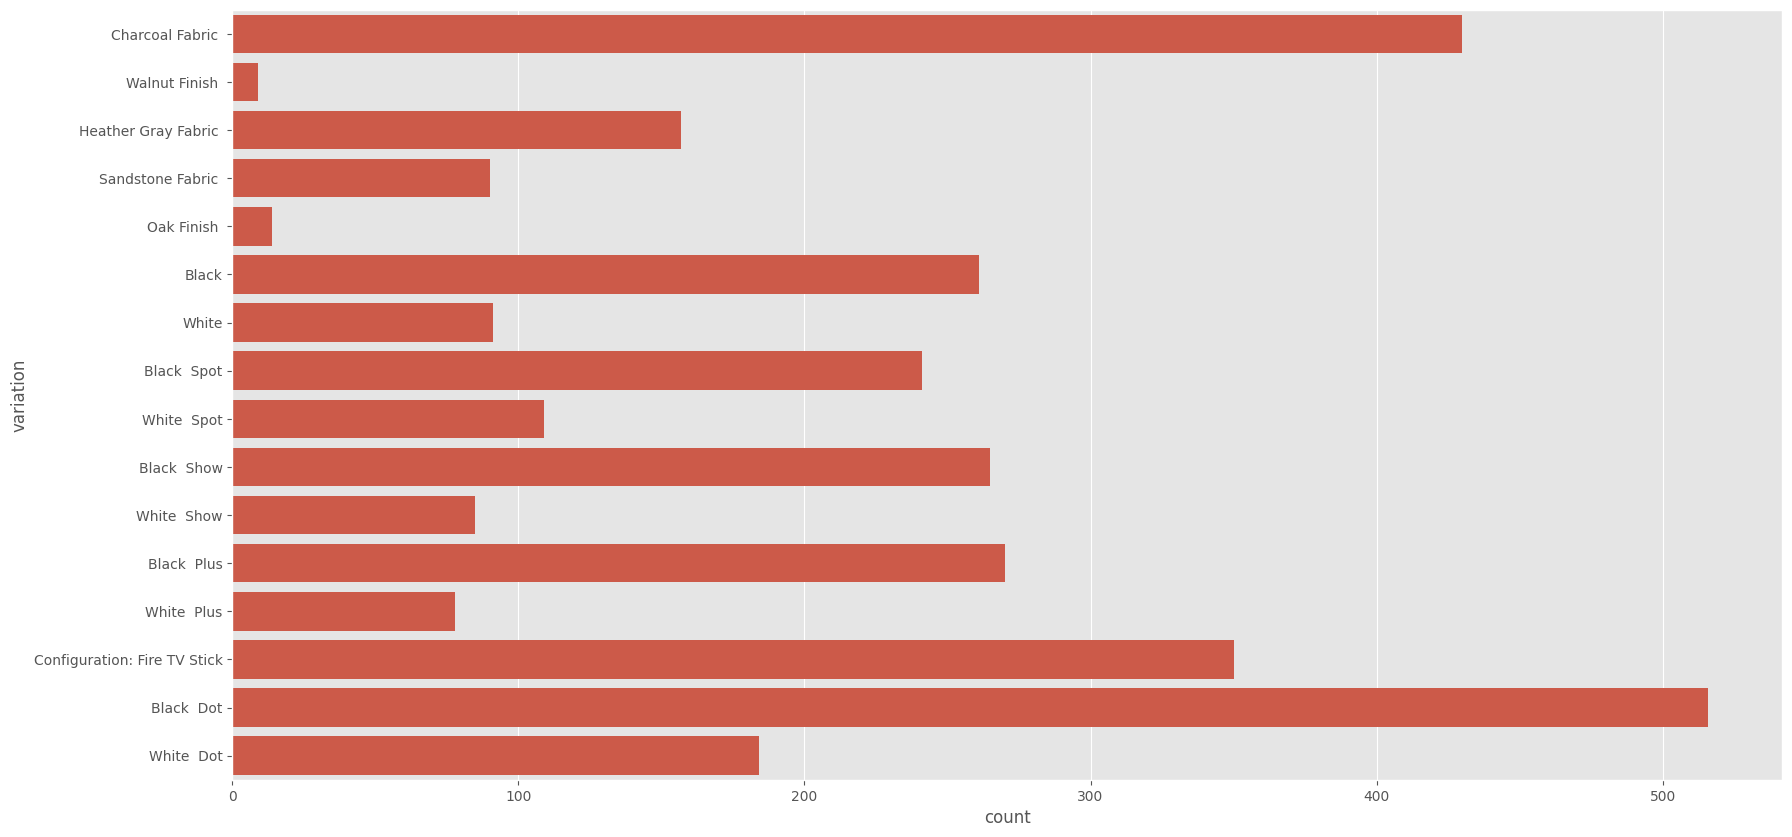

In [ ]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y='variation', data=df)

In [ ]:
df['variation'].value_counts()


,count
variation,
Black Dot,516
Charcoal Fabric,430
Configuration: Fire TV Stick,350
Black Plus,270
Black Show,265
Black,261
Black Spot,241
White Dot,184
Heather Gray Fabric,157


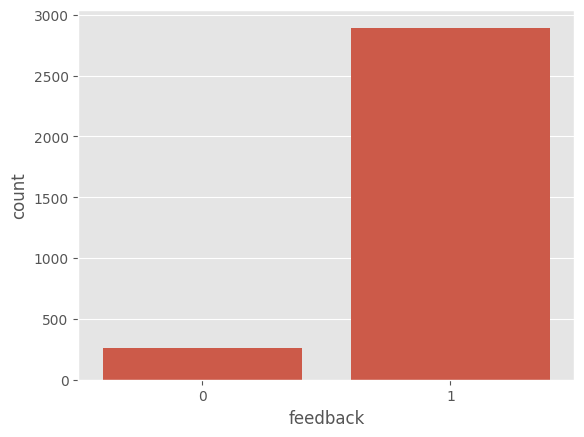

In [ ]:
sns.countplot(x='feedback', data=df)
plt.show()

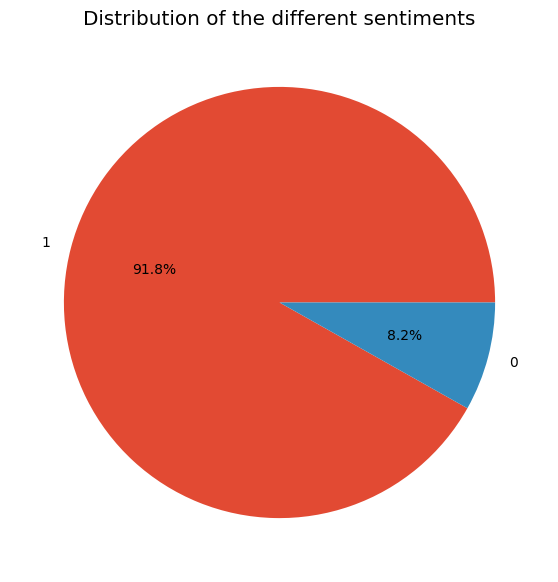

In [ ]:
fig = plt.figure(figsize=(7,7))
tags = df['feedback'].value_counts()
tags.plot(kind='pie', autopct="%1.1f%%", label='')
plt.title("Distribution of the different sentiments")
plt.show()

In [ ]:
for i in range(5):
    print(df['verified_reviews'].iloc[i], "\n")
    print(df['feedback'].iloc[i], "\n")

Love my Echo! 

1 

Loved it! 

1 

Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. 

1 

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. 

1 

Music 

1 



In [ ]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'[^\w\s]','', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [ ]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Ensure stopwords are downloaded
stop_words = set(stopwords.words('english'))

# Load your DataFrame
df = pd.read_csv('amazon_alexa.tsv', sep='\t')

# Replace NaN values with empty strings
df['verified_reviews'].fillna('', inplace=True)

def data_processing(text):
    if isinstance(text, str) and text.strip():  # Check if the input is a non-empty string
        text = text.lower()  # Convert to lowercase
        text = re.sub(r"https\S+|www\S+|http\S+", '', text)  # Remove URLs
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text_tokens = word_tokenize(text)  # Tokenize text
        filtered_text = [w for w in text_tokens if w not in stop_words]  # Remove stopwords
        return " ".join(filtered_text)  # Join tokens back into a string
    else:
        return ""  # Return an empty string for non-string inputs

# Apply the data processing function to the verified_reviews column
df['verified_reviews'] = df['verified_reviews'].apply(data_processing)

# Display the processed reviews for verification
print(df['verified_reviews'].head())


<ipython-input-183-836bed1962a1>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['verified_reviews'].fillna('', inplace=True)


0                                            love echo
1                                                loved
2    sometimes playing game answer question correct...
3    lot fun thing 4 yr old learns dinosaurs contro...
4                                                music
Name: verified_reviews, dtype: object


In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Ensure stopwords are downloaded
stop_words = set(stopwords.words('english'))

# Load your DataFrame
df = pd.read_csv('amazon_alexa.tsv', sep='\t')

# Replace NaN values with empty strings
df['verified_reviews'].fillna('', inplace=True)

def data_processing(text):
    if isinstance(text, str) and text.strip():  # Check if the input is a non-empty string
        text = text.lower()  # Convert to lowercase
        text = re.sub(r"https\S+|www\S+|http\S+", '', text)  # Remove URLs
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text_tokens = word_tokenize(text)  # Tokenize text
        filtered_text = [w for w in text_tokens if w not in stop_words]  # Remove stopwords
        return " ".join(filtered_text)  # Join tokens back into a string
    else:
        return ""  # Return an empty string for non-string inputs

# Apply the data processing function to the verified_reviews column
df['verified_reviews'] = df['verified_reviews'].apply(data_processing)

# Display the processed reviews for verification
print(df['verified_reviews'].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-184-14d232e47ccf>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['verified_reviews'].fillna('', inplace=True)


0                                            love echo
1                                                loved
2    sometimes playing game answer question correct...
3    lot fun thing 4 yr old learns dinosaurs contro...
4                                                music
Name: verified_reviews, dtype: object


In [ ]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [ ]:
df['verified_reviews'] = df['verified_reviews'].apply(lambda x: stemming(x))

In [ ]:
for i in range(5):
    print(df['verified_reviews'].iloc[i], "\n")
    print(df['feedback'].iloc[i], "\n")

love echo 

1 

loved 

1 

sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home 

1 

lot fun thing 4 yr old learns dinosaurs control lights play games like categories nice sound playing music well 

1 

music 

1 



In [ ]:
pos_reviews= df[df.feedback==1]
pos_reviews.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,love echo,1
1,5,31-Jul-18,Charcoal Fabric,loved,1
2,4,31-Jul-18,Walnut Finish,sometimes playing game answer question correct...,1
3,5,31-Jul-18,Charcoal Fabric,lot fun thing 4 yr old learns dinosaurs contro...,1
4,5,31-Jul-18,Charcoal Fabric,music,1


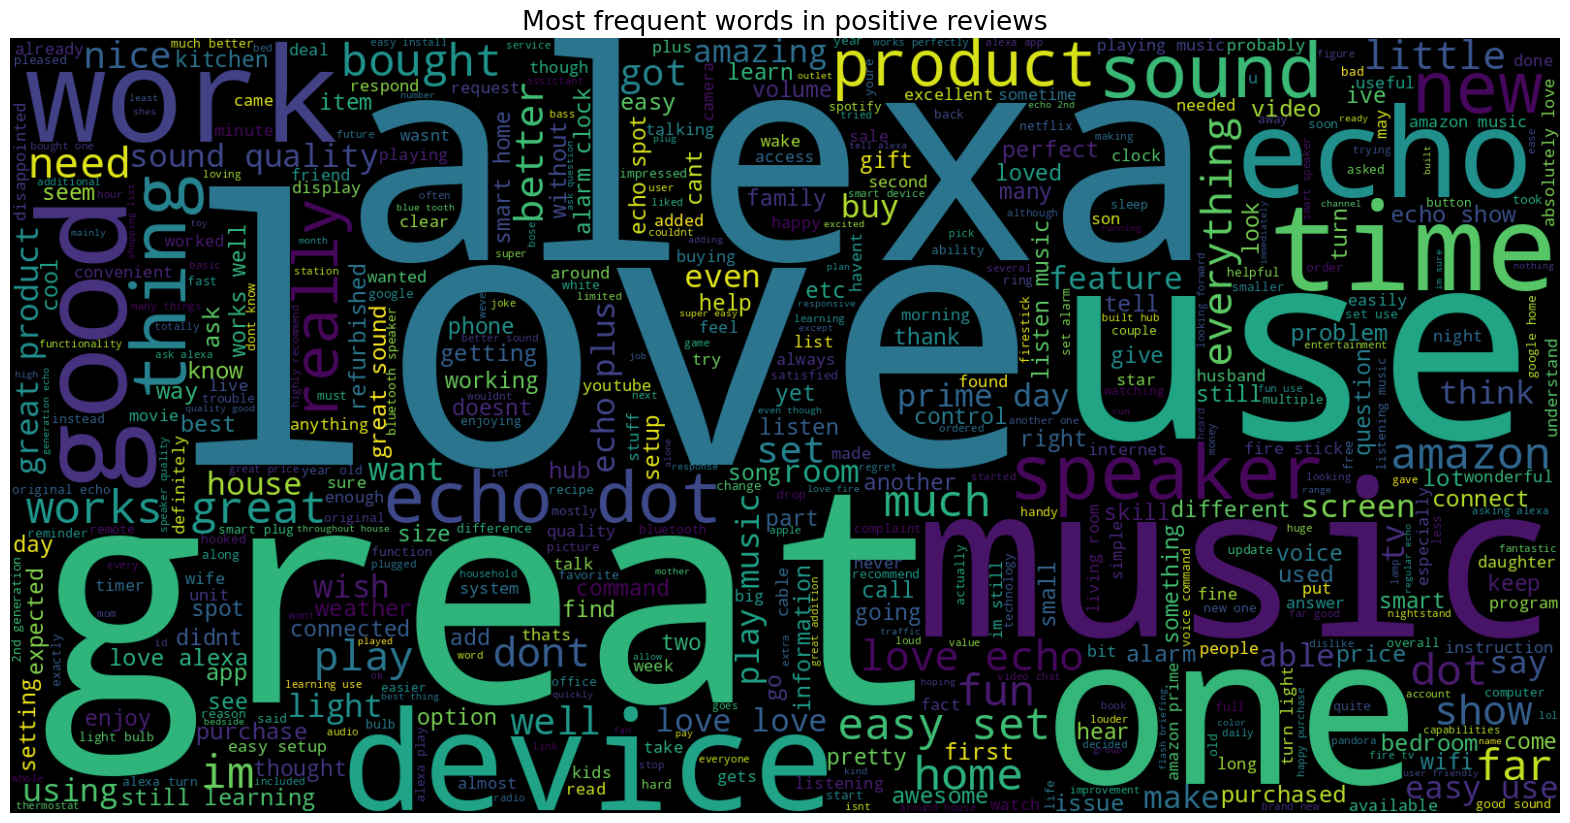

In [ ]:
text = ' '.join([word for word in pos_reviews['verified_reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize=19)
plt.show()

In [ ]:
neg_reviews= df[df.feedback==0]
neg_reviews.head()

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,like siri fact siri answers accurately alexa d...,0
111,2,30-Jul-18,Charcoal Fabric,sound terrible u want good music get bose,0
141,1,30-Jul-18,Charcoal Fabric,much features,0
162,1,30-Jul-18,Sandstone Fabric,stopped working 2 weeks didnt follow commands ...,0
176,2,30-Jul-18,Heather Gray Fabric,sad joke worthless,0


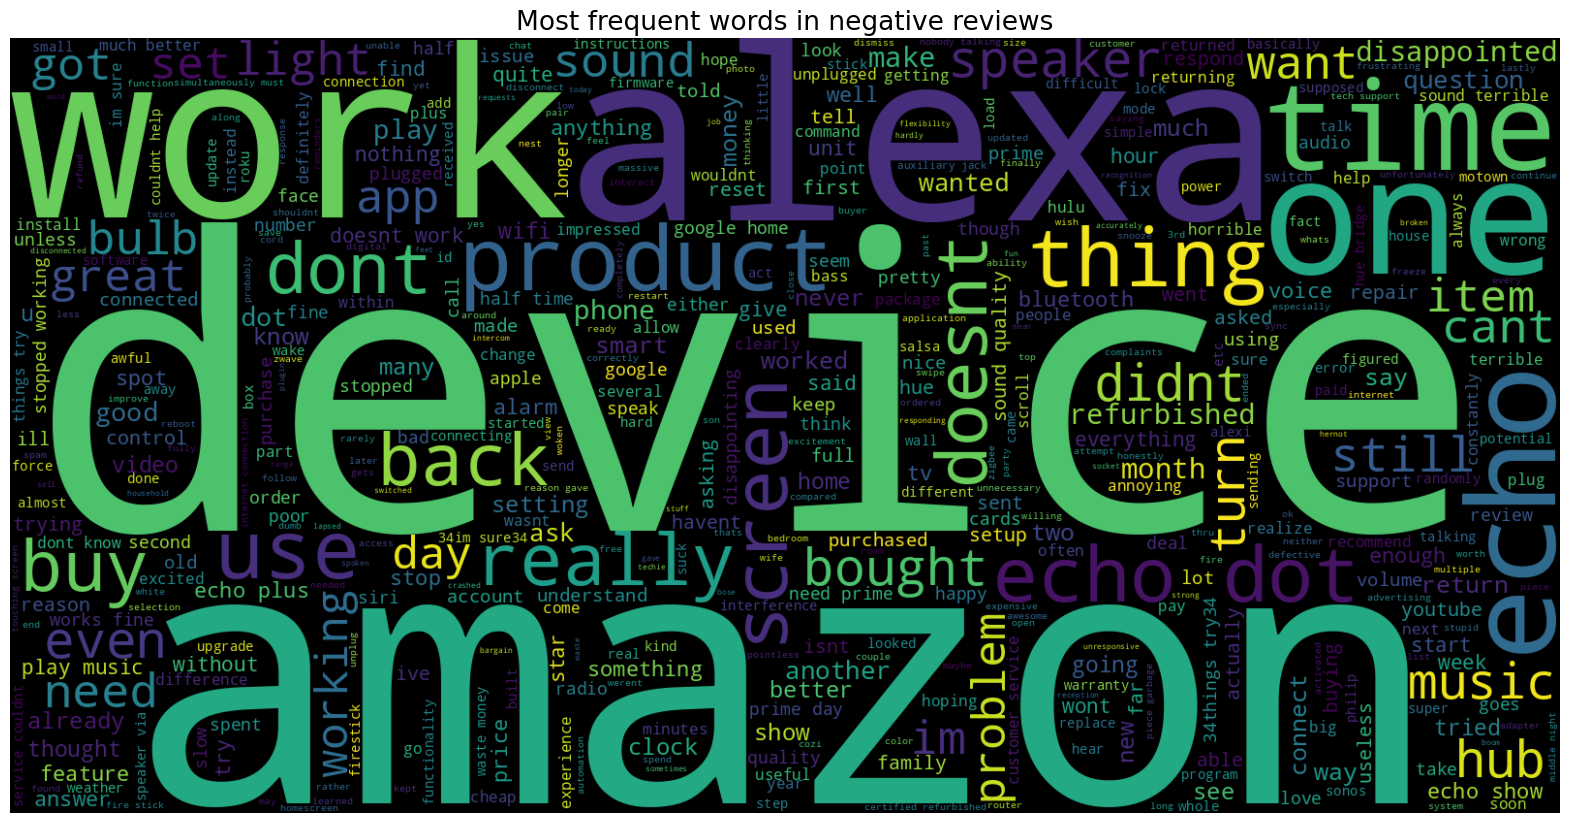

In [ ]:
text = ' '.join([word for word in neg_reviews['verified_reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative reviews', fontsize=19)
plt.show()

In [ ]:
import tensorflow as tf
print(tf.__version__)  # Should print the version of TensorFlow

# Test if Keras is available through TensorFlow
from tensorflow.keras.models import Sequential
print("Keras imported successfully!")


2.17.0
Keras imported successfully!


In [ ]:
from keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer # Updated import
from tensorflow.keras.utils import pad_sequences # Updated import
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical


In [ ]:
tokenizer = Tokenizer(num_words=500, split=' ')
tokenizer.fit_on_texts(df['verified_reviews'])
X = tokenizer.texts_to_sequences(df['verified_reviews'])
X = pad_sequences(X)
X

array([[  0,   0,   0, ...,   0,   1,   2],
       [  0,   0,   0, ...,   0,   0, 175],
       [  0,   0,   0, ...,  71, 260,  21],
       ...,
       [  0,   0,   0, ...,  86,  45,  28],
       [  0,   0,   0, ..., 111, 122, 107],
       [  0,   0,   0, ...,   0,   0,  14]], dtype=int32)

In [ ]:
X.shape


(3150, 145)

In [ ]:
Y = df['feedback']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (2520, 145)
Size of y_train:  (2520,)
Size of x_test:  (630, 145)
Size of y_test:  (630,)


In [ ]:
model = Sequential()
model.add(Embedding(500, 120, input_length= X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 186ms/step - accuracy: 0.8630 - loss: 0.3841
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 0.9151 - loss: 0.2616
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.9366 - loss: 0.1633
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.9578 - loss: 0.1184
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9662 - loss: 0.0945
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.9677 - loss: 0.0806
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.9798 - loss: 0.0622
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9778 - loss: 0.0617
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.9832 - loss: 0.0478
Epoch 10/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 116ms/step - accuracy: 0.9823 - loss: 0.0515


In [ ]:
Scores = model.evaluate(x_test, y_test)
print("Accuracy = %0.3f%%"%(Scores[1]*100))

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9123 - loss: 0.2371
Accuracy = 92.063%


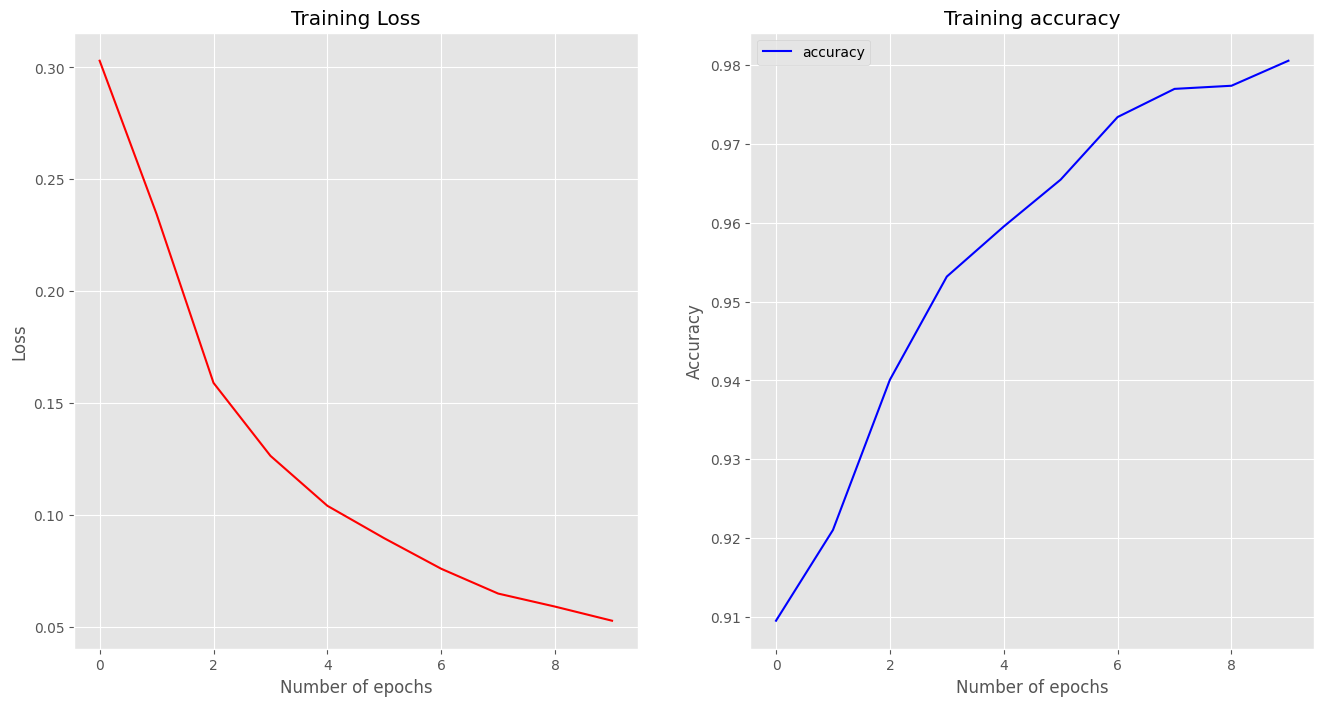

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()